In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [2]:
titanic= pd.read_csv(r"Z:\226518\Datasets\titanic_train.csv")
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


# Check Data Types

In [3]:
titanic.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

# Missing Values?

In [4]:
titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
titanic=titanic.drop(['cabin','body','boat','home.dest'],axis=1)
titanic=titanic.dropna()
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0
...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,0


In [6]:
titanic.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

# Data Visualization

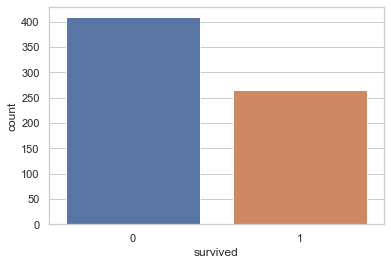

In [7]:
sns.countplot(x='survived',data=titanic);

High frequency of people who didn't survive

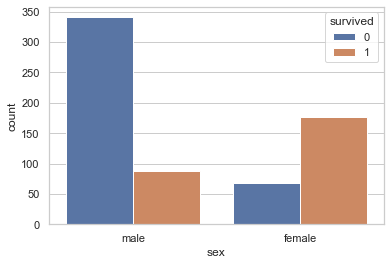

In [8]:
sns.countplot(x='sex',hue='survived',data=titanic);

Sex seems to affect Survival

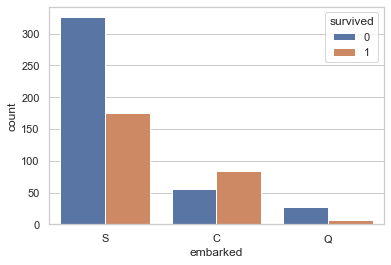

In [9]:
sns.countplot(x='embarked',hue='survived',data=titanic);

Embarked seems to affect Survival

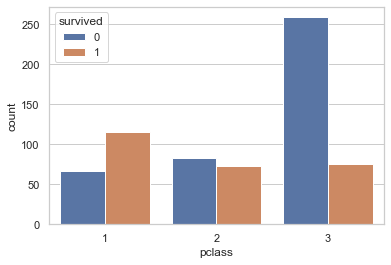

In [10]:
sns.countplot(x='pclass',hue='survived',data=titanic);

Class of passenger seems to affect Survival

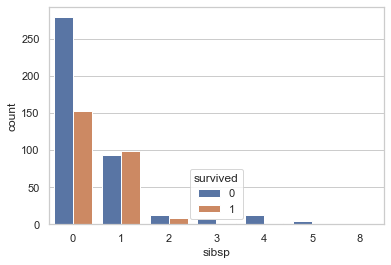

In [11]:
sns.countplot(x='sibsp',hue='survived',data=titanic);

Sibsp seems to affect Survival

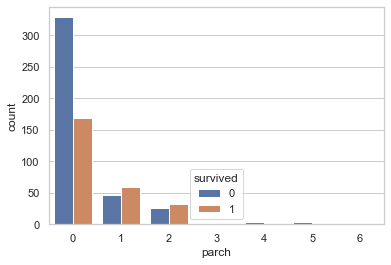

In [12]:
sns.countplot(x='parch',hue='survived',data=titanic);

Parch seems to affect Survival

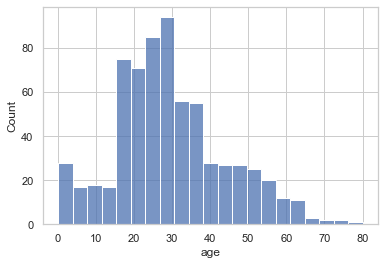

In [13]:
sns.histplot(x='age',data=titanic);

More passengers within the 20-30 age group

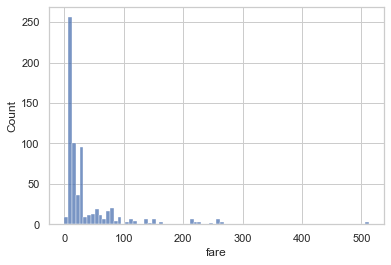

In [14]:
sns.histplot(x='fare',data=titanic);

More passengers with lower fare

# Create Dummy Variables

In [15]:
titanic.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

In [16]:
titanic=pd.get_dummies(titanic,columns=['sex','embarked'])
titanic

,passenger_id,pclass,name,age,sibsp,parch,ticket,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,699,3,"Cacic, Mr. Luka",38.0,0,0,315089,8.6625,0,0,1,0,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",30.0,1,1,345773,24.1500,0,1,0,0,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",54.0,1,3,29105,23.0000,1,1,0,0,0,1
4,576,2,"Veal, Mr. James",40.0,0,0,28221,13.0000,0,0,1,0,0,1
5,1083,3,"Olsen, Mr. Henry Margido",28.0,0,0,C 4001,22.5250,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",55.0,0,0,680,50.0000,0,0,1,0,0,1
846,174,1,"Kent, Mr. Edward Austin",58.0,0,0,11771,29.7000,0,0,1,1,0,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",24.0,1,0,244367,26.0000,1,1,0,0,0,1
848,1112,3,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.7750,0,1,0,0,0,1


In [17]:
y=['survived']
X=['pclass', 'sex_male', 'age', 'sibsp', 'parch', 'fare', 'embarked_C','embarked_Q']

In [18]:
pd.DataFrame(titanic[X])

,pclass,sex_male,age,sibsp,parch,fare,embarked_C,embarked_Q
1,3,1,38.0,0,0,8.6625,0,0
2,3,0,30.0,1,1,24.1500,0,0
3,2,0,54.0,1,3,23.0000,0,0
4,2,1,40.0,0,0,13.0000,0,0
5,3,1,28.0,0,0,22.5250,0,0
...,...,...,...,...,...,...,...,...
845,1,1,55.0,0,0,50.0000,0,0
846,1,1,58.0,0,0,29.7000,1,0
847,2,0,24.0,1,0,26.0000,0,0
848,3,0,3.0,1,1,13.7750,0,0


# Predictors

In [19]:
x=np.array(titanic[X])
x

array([[ 3.    ,  1.    , 38.    , ...,  8.6625,  0.    ,  0.    ],
       [ 3.    ,  0.    , 30.    , ..., 24.15  ,  0.    ,  0.    ],
       [ 2.    ,  0.    , 54.    , ..., 23.    ,  0.    ,  0.    ],
       ...,
       [ 2.    ,  0.    , 24.    , ..., 26.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  3.    , ..., 13.775 ,  0.    ,  0.    ],
       [ 2.    ,  1.    , 52.    , ..., 13.    ,  0.    ,  0.    ]])

# Dependent Variable

In [20]:
y=np.array(titanic[y])
y

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

# Training and Testing data

In [21]:
x_train=x
y_train=y

In [22]:
x_train

array([[ 3.    ,  1.    , 38.    , ...,  8.6625,  0.    ,  0.    ],
       [ 3.    ,  0.    , 30.    , ..., 24.15  ,  0.    ,  0.    ],
       [ 2.    ,  0.    , 54.    , ..., 23.    ,  0.    ,  0.    ],
       ...,
       [ 2.    ,  0.    , 24.    , ..., 26.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  3.    , ..., 13.775 ,  0.    ,  0.    ],
       [ 2.    ,  1.    , 52.    , ..., 13.    ,  0.    ,  0.    ]])

In [23]:
titanic_test1= pd.read_csv(r"Z:\226524\Datasets\titanic_test.csv")
titanic_test2= pd.read_csv(r"Z:\226524\Datasets\gender_baseline.csv")
titanic_test=titanic_test1.merge(titanic_test2, on = 'passenger_id', how = 'left')
titanic_test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA",0
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN,0
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ",0
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON",0
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN,0


In [24]:
titanic_test=titanic_test.drop(['cabin','body','boat','home.dest'],axis=1)
titanic_test=titanic_test.dropna()
titanic_test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0000,0,2,17421,110.8833,C,0
2,89,1,"Davidson, Mr. Thornton",male,31.0000,1,0,F.C. 12750,52.0000,S,0
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0000,0,0,SOTON/O2 3101272,7.1250,S,0
4,1020,3,"Minkoff, Mr. Lazar",male,21.0000,0,0,349211,7.8958,S,0
5,747,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,S,0


In [25]:
titanic_test=pd.get_dummies(titanic_test,columns=['sex','embarked'])

In [26]:
x_test=np.array(titanic_test[X])
x_test

array([[  1.    ,   1.    ,  17.    , ..., 110.8833,   1.    ,   0.    ],
       [  1.    ,   1.    ,  31.    , ...,  52.    ,   0.    ,   0.    ],
       [  3.    ,   1.    ,  41.    , ...,   7.125 ,   0.    ,   0.    ],
       ...,
       [  2.    ,   1.    ,  23.    , ...,  13.    ,   0.    ,   0.    ],
       [  2.    ,   1.    ,  16.    , ...,  10.5   ,   0.    ,   0.    ],
       [  3.    ,   0.    ,  10.    , ...,  24.15  ,   0.    ,   0.    ]])

In [27]:
y_test=np.array(titanic_test['survived'])
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

# Decision Tree

In [28]:
model=DecisionTreeClassifier(criterion = "gini")
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict the results

In [29]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [30]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

# Check accuracy score

In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9837
Test set score: 0.7751


Since for both the training set the accuracy is higher significantly, there is overfitting.

# Confusion Matrix

In [32]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[192  36]
 [ 47  94]]

True Positives(TP) =  192

True Negatives(TN) =  94

False Positives(FP) =  36

False Negatives(FN) =  47


<AxesSubplot:>

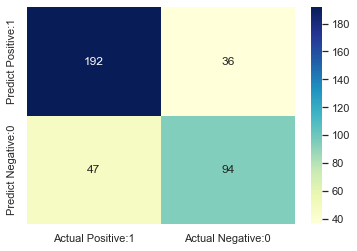

In [33]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       228
           1       0.72      0.67      0.69       141

    accuracy                           0.78       369
   macro avg       0.76      0.75      0.76       369
weighted avg       0.77      0.78      0.77       369



## Classification accuracy

In [35]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [36]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7751


## Classification error

In [37]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2249
